In [16]:
import urllib.request
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing import image 
from sklearn.model_selection import train_test_split
drive.mount('/content/gdrive')

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Przygotowanie danych**

In [17]:
data1 = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data_widzenie')


def wyswietl(obraz):
  plt.imshow(obraz, cmap='gray')
  plt.axis('off')
  plt.show()

# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

Found 790 files belonging to 2 classes.


In [ ]:

for i in range (1, 21):
  image = img_to_array(load_img('/content/gdrive/MyDrive/dat/lawki/lawka' + str(i) + '.jpg'))
  image_ = np.expand_dims(image, axis=0)
  imgen = ImageDataGenerator(
    height_shift_range=0.2,
    zoom_range=[0.5,2],
    shear_range=50,
    vertical_flip=True
    )
  img_train = imgen.flow(image_, batch_size=1, save_to_dir='/content/gdrive/MyDrive/data_widzenie/lawki_wyg')



for i in range (1, 11):
  image = img_to_array(load_img('/content/gdrive/MyDrive/dat/smietniki/smietnik' + str(i) + '.jpg'))
  image_ = np.expand_dims(image, axis=0)
  imgen = ImageDataGenerator(
    height_shift_range=0.2,
    zoom_range=[0.5,2],
    shear_range=50,
    vertical_flip=True
    )
  img_train = imgen.flow(image_, batch_size=1, save_to_dir='/content/gdrive/MyDrive/data_widzenie/smietniki_wyg')

In [18]:
data = data1.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.23921569, 0.25490198, 0.2901961 ],
          [0.23921569, 0.25490198, 0.2901961 ],
          [0.23753063, 0.2528799 , 0.28682598],
          ...,
          [0.2901961 , 0.34117648, 0.21960784],
          [0.2901961 , 0.34117648, 0.21960784],
          [0.2901961 , 0.34117648, 0.21960784]],
 
         [[0.23926164, 0.25496325, 0.29025736],
          [0.23926164, 0.25496325, 0.29025736],
          [0.23758054, 0.25294513, 0.28689384],
          ...,
          [0.29024205, 0.34122244, 0.2196538 ],
          [0.29024205, 0.34122244, 0.2196538 ],
          [0.29024205, 0.34122244, 0.2196538 ]],
 
         [[0.24321385, 0.26023284, 0.29552695],
          [0.24321385, 0.26023284, 0.29552695],
          [0.24187239, 0.25855437, 0.29272953],
          ...,
          [0.29419425, 0.34517464, 0.223606  ],
          [0.29419425, 0.34517464, 0.223606  ],
          [0.29419425, 0.34517464, 0.223606  ]],
 
         ...,
 
         [[0.31897977, 0.3268229 , 0.37913603],
          [0.31897

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


**Uczenie modelu**

In [20]:

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

**Trenowanie**

In [22]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=22, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/22
17/17 [==============================] - 39s 2s/step - loss: 0.6634 - accuracy: 0.5699 - val_loss: 0.6533 - val_accuracy: 0.6562
Epoch 2/22
17/17 [==============================] - 35s 2s/step - loss: 0.5916 - accuracy: 0.6930 - val_loss: 0.5254 - val_accuracy: 0.7188
Epoch 3/22
17/17 [==============================] - 33s 2s/step - loss: 0.4492 - accuracy: 0.7960 - val_loss: 0.3517 - val_accuracy: 0.8687
Epoch 4/22
17/17 [==============================] - 34s 2s/step - loss: 0.3006 - accuracy: 0.8897 - val_loss: 0.3900 - val_accuracy: 0.8125
Epoch 5/22
17/17 [==============================] - 34s 2s/step - loss: 0.2692 - accuracy: 0.8952 - val_loss: 0.1986 - val_accuracy: 0.9312
Epoch 6/22
17/17 [==============================] - 37s 2s/step - loss: 0.2057 - accuracy: 0.9136 - val_loss: 0.1707 - val_accuracy: 0.9312
Epoch 7/22
17/17 [==============================] - 34s 2s/step - loss: 0.1631 - accuracy: 0.9393 - val_loss: 0.1414 - val_accuracy: 0.9500
Epoch 8/22
17/17 [==

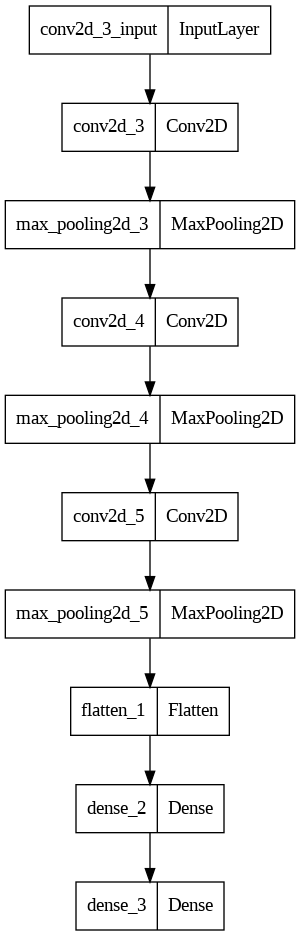

In [23]:
tf.keras.utils.plot_model(model)

**Wykresy**

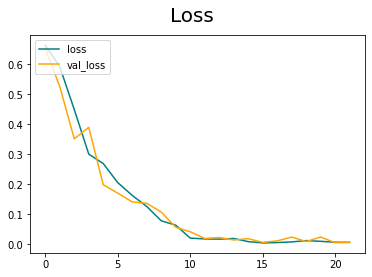

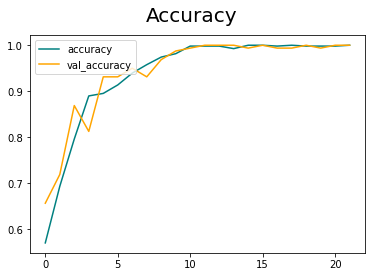

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**Test**

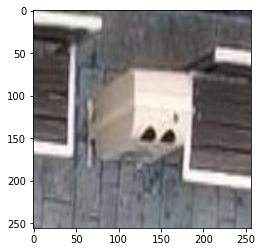

In [25]:

img1 = cv2.imread('/content/gdrive/MyDrive/dat/smietniki/smietnik1.jpg')
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [26]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat
if yhat > 0.5: 
    print(f'Predicted class is Smietnik')
else:
    print(f'Predicted class is Lawka')

1/1 [==============================] - 0s 153ms/step
Predicted class is Lawka


8/8 [==============================] - 4s 440ms/step


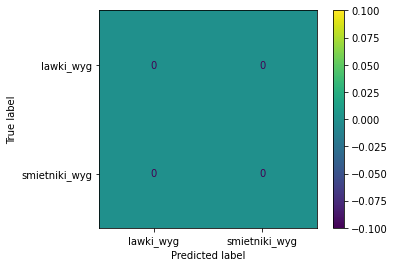

In [37]:


data_directory = Path('gdrive/MyDrive/data_widzenie').resolve()

X, y = [], []
for dir in data_directory.iterdir():
    for file in dir.iterdir():
        img = cv2.imread(str(file))
        img = cv2.resize(img, (256, 256))
        X.append(img)
        y.append(dir.name)

X = np.array(X)
y = np.array(y).reshape(-1, 1)

X = X/255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(y_test, Y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(y_test))
disp.plot()


In [34]:
print(X_train)

[[[[0.55686275 0.56470588 0.56862745]
   [0.55686275 0.56470588 0.56862745]
   [0.55686275 0.56470588 0.56862745]
   ...
   [0.13333333 0.21176471 0.22745098]
   [0.16078431 0.23529412 0.25098039]
   [0.16862745 0.24313725 0.25490196]]

  [[0.55294118 0.56078431 0.56470588]
   [0.55294118 0.56078431 0.56470588]
   [0.55294118 0.56078431 0.56470588]
   ...
   [0.13333333 0.21176471 0.22745098]
   [0.16862745 0.24313725 0.25490196]
   [0.17254902 0.25098039 0.2627451 ]]

  [[0.54901961 0.55686275 0.56078431]
   [0.54901961 0.55686275 0.56078431]
   [0.54901961 0.55686275 0.56078431]
   ...
   [0.12941176 0.20784314 0.22352941]
   [0.16470588 0.24313725 0.25882353]
   [0.17254902 0.25098039 0.2627451 ]]

  ...

  [[0.63529412 0.63529412 0.63529412]
   [0.63529412 0.63529412 0.63529412]
   [0.63529412 0.63529412 0.63529412]
   ...
   [0.30196078 0.26666667 0.25098039]
   [0.30588235 0.27058824 0.25490196]
   [0.30588235 0.27058824 0.25490196]]

  [[0.63921569 0.63921569 0.63921569]
   [0.6

In [28]:
data_val_net = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/lawki_net')

Found 10 files belonging to 1 classes.


Sprawdzanie klasyfikacji na zdjęciach ławek, które zostały pobrane z internetu

In [29]:
for i in range(1,11):
  img1 = cv2.imread('/content/gdrive/MyDrive/lawki_net/law/lawka_n_'+ str(i) +'.jpg' )
  resize = tf.image.resize(img1, (256,256))
  pred_net = model.predict(np.expand_dims(resize/255, 0))
  if pred_net > 0.5: 
    print(f'Predicted class is Smietnik')
  else:
    print(f'Predicted class is Lawka')


1/1 [==============================] - 0s 40ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 45ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 35ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 35ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 35ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 35ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 42ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 39ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 34ms/step
Predicted class is Lawka
1/1 [==============================] - 0s 36ms/step
Predicted class is Lawka


In [30]:
for i in range(1,11):
  img_ = '/content/gdrive/MyDrive/lawki_net/law/lawka_n_'+ str(i) +'.jpg'
  obraz = np.expand_dims(image.img_to_array(image.load_img(img_, target_size=(224,224,3))), axis=0)
  nn = tf.keras.applications.vgg16.VGG16(weights='imagenet')
  y_pred = nn.predict(obraz)
  tf.keras.applications.vgg16.decode_predictions(y_pred, top=2)



1/1 [==============================] - 1s 754ms/step


1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 736ms/step
